Importing libraries

In [81]:
import pandas as pd

Reading the data files

In [64]:
customers = pd.read_csv(r"..\data\olist_customers_dataset.csv")
order_items = pd.read_csv(r"..\data\olist_order_items_dataset.csv")
orders_payments = pd.read_csv(r"..\data\olist_order_payments_dataset.csv")
orders_reviews = pd.read_csv(r"..\data\olist_order_reviews_dataset.csv")
orders = pd.read_csv(r"..\data\olist_orders_dataset.csv")
products = pd.read_csv(r"..\data\olist_products_dataset.csv")
sellers = pd.read_csv(r"..\data\olist_sellers_dataset.csv")

Basic Exploratory Analysis

Orders Dataset

In [65]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [82]:
orders["order_status"].value_counts(normalize=True).sort_values(ascending=False)

delivered      0.970203
shipped        0.011132
canceled       0.006285
unavailable    0.006124
invoiced       0.003158
processing     0.003027
created        0.000050
approved       0.000020
Name: order_status, dtype: float64

In [67]:
orders.shape

(99441, 8)

In [68]:
len(orders["order_id"]) - orders["order_id"].nunique()

0

Analyzing the "order_id" variable we can verify that there is no duplicate records in the "Orders" dataset.

Also, 97% of all orders were already delivered. 

Order Items Dataset

In [69]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [70]:
order_items.shape

(112650, 7)

<AxesSubplot:xlabel='order_item_id'>

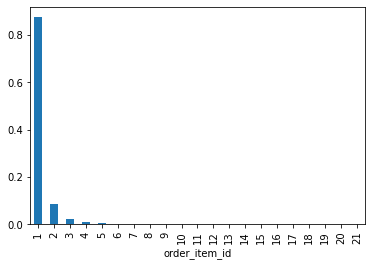

In [71]:
(
    order_items.groupby("order_item_id")["order_id"].count()
    / len(order_items["order_id"])
).plot(kind="bar")

Analyzing the "order_item_id" we can verify that 87% of the orders contains only one item.

Products Dataset

In [72]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


The Products dataset contains useful information about the products sold, such as category, dimensions and wheight.

Customers Dataset

In [73]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Merging the datasets

In [74]:
df = pd.merge(order_items, products, how="left", on="product_id")

# left join, matching the data on the "orders_items"  with the "products" by the "product_id" variable.

In [75]:
df = pd.merge(df, orders, how="left", on="order_id")

# left join, matching the data on the "df" dataset  with the "orders" dataset by the "order_id" variable.

In [76]:
df = pd.merge(df, customers, how="left", on="customer_id")
# Left join, matching the data on the "df" dataset  with the "customers" dataset by the "customer_id" variable.

In [77]:
df = pd.merge(df, orders_reviews, how="left", on="order_id")

In [78]:
df = pd.merge(df, sellers, how="left", on="seller_id")

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113314 entries, 0 to 113313
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113314 non-null  object 
 1   order_item_id                  113314 non-null  int64  
 2   product_id                     113314 non-null  object 
 3   seller_id                      113314 non-null  object 
 4   shipping_limit_date            113314 non-null  object 
 5   price                          113314 non-null  float64
 6   freight_value                  113314 non-null  float64
 7   product_category_name          111702 non-null  object 
 8   product_name_lenght            111702 non-null  float64
 9   product_description_lenght     111702 non-null  float64
 10  product_photos_qty             111702 non-null  float64
 11  product_weight_g               113296 non-null  float64
 12  product_length_cm             

Now we have a unique dataset containing useful data of almost all individuals datasets.

In [72]:
df.to_feather(r"..\data\olist_merged_dataset.feather")